**Group Members**

1. Kullapat Sommanus 6220422049

2. Harit Pisarnpruek 6220422062

3. Washiraporn Jaruwitayawet 6220422009

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.8 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 45.8 MB/s 
     |████████████████████████████████| 6.8 MB 53.4 MB/s 
     |████████████████████████████████| 2.0 MB 27.2 MB/s 
     |████████████████████████████████| 271 kB 55.3 MB/s 
     |████████████████████████████████| 261 kB 67.3 MB/s 
     |████████████████████████████████| 1.7 MB 43.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 49.1 MB/s 
     |████████████████████████████████| 1.3 MB 29.1 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 14.6 MB 122 kB/s 
     |████████████████████████████████| 3.1 MB 52.5 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |██████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import statsmodels as sm
from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import seaborn as sns

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/In-class Assignment - Customer Segmentation/Code Templates/Supermarket Data.csv')
print(df.shape)
df.head()

(956574, 22)


,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df.tail()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


In [ ]:
df.SHOP_WEEKDAY.value_counts()

6    138691
2    137294
3    136933
4    136853
1    136386
5    135880
7    134537
Name: SHOP_WEEKDAY, dtype: int64

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
# One-hot Encoding for Category features
encode_cols = ["BASKET_DOMINANT_MISSION","BASKET_TYPE","STORE_REGION","BASKET_SIZE","CUST_LIFESTAGE"]
cols = ["CUST_CODE"]
df = pd.get_dummies(df, prefix=None, prefix_sep='_',columns = encode_cols)
print(df.shape)
df.head()

(956574, 37)


,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,BASKET_ID,BASKET_PRICE_SENSITIVITY,STORE_CODE,STORE_FORMAT,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX,STORE_REGION_E02,STORE_REGION_W01,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,994107800547472,MM,STORE00001,LS,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,994107900512001,MM,STORE00001,LS,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,994108700468327,MM,STORE00001,LS,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,994107700237811,LA,STORE00001,LS,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,994108300002212,MM,STORE00001,LS,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
##prepare customer single view
df_csv = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  TotalQuantity = ('QUANTITY', 'sum'),
                                                                                  AvgSpend = ('SPEND', 'mean'),
                                                                                  AvgQuantity = ('QUANTITY', 'mean'),
                                                                                  AvgShopWeek = ('SHOP_WEEKDAY', 'mean'),
                                                                                  AvgShopHour = ('SHOP_HOUR', 'mean'),
                                                                     TotalFresh = ('BASKET_DOMINANT_MISSION_Fresh', 'sum'),
                                                                     TotalGrocery = ('BASKET_DOMINANT_MISSION_Grocery', 'sum'),
                                                                     TotalMixed = ('BASKET_DOMINANT_MISSION_Mixed', 'sum'),
                                                                     TotalNonfood = ('BASKET_DOMINANT_MISSION_Nonfood', 'sum'),
                                                                     TotalXX = ('BASKET_DOMINANT_MISSION_XX', 'sum'),
                                                                     TotalSize_L = ('BASKET_SIZE_L', 'sum'),
                                                                     TotalSize_M = ('BASKET_SIZE_M', 'sum'),
                                                                     TotalSize_S = ('BASKET_SIZE_S', 'sum'),
                                                                     CUST_LIFESTAGE_OA = ('CUST_LIFESTAGE_OA', 'max'),
                                                                     CUST_LIFESTAGE_OF = ('CUST_LIFESTAGE_OF', 'max'),
                                                                     CUST_LIFESTAGE_OT = ('CUST_LIFESTAGE_OT', 'max'),
                                                                     CUST_LIFESTAGE_PE = ('CUST_LIFESTAGE_PE', 'max'),
                                                                     CUST_LIFESTAGE_YA = ('CUST_LIFESTAGE_YA', 'max'),
                                                                     CUST_LIFESTAGE_YF = ('CUST_LIFESTAGE_YF', 'max')).reset_index()
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

##find max date in the dataset
max_date = df_csv['LastDate'].max()

##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

##calculate weekday of lastest date
df_csv["WEEKDAY"] = df_csv["LastDate"].dt.dayofweek


print(df_csv.shape)
df_csv.head()

(6100, 29)


,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,1,2.440000,1.000000,7.000000,13.000000,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,2.440000,1,547,5
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,923,1.372432,1.320458,4.090129,15.420601,479.0,87.0,127.0,6,0,83.0,499.0,117.0,1,0,0,0,0,0,4.360591,812,1,5
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,334,1.776054,1.805405,3.416216,15.367568,34.0,16.0,132.0,3,0,164.0,17.0,4.0,0,0,0,0,0,0,20.535625,338,13,0
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,6,1.487500,1.500000,3.250000,11.500000,0.0,2.0,0.0,2,0,0.0,1.0,3.0,0,0,0,0,0,0,1.983333,65,730,4
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,34,1.589600,1.360000,4.000000,15.400000,13.0,0.0,12.0,0,0,23.0,0.0,2.0,0,0,0,0,0,0,9.935000,610,14,6


In [ ]:
cols = list(df_csv.columns)
ignore_cols = ["CUST_CODE", "FirstDate", "LastDate"]
features = [i for i in cols if i not in ignore_cols]
print(len(features), "features")
features

26 features


['TotalSpend',
 'TotalVisits',
 'TotalSKUs',
 'TotalQuantity',
 'AvgSpend',
 'AvgQuantity',
 'AvgShopWeek',
 'AvgShopHour',
 'TotalFresh',
 'TotalGrocery',
 'TotalMixed',
 'TotalNonfood',
 'TotalXX',
 'TotalSize_L',
 'TotalSize_M',
 'TotalSize_S',
 'CUST_LIFESTAGE_OA',
 'CUST_LIFESTAGE_OF',
 'CUST_LIFESTAGE_OT',
 'CUST_LIFESTAGE_PE',
 'CUST_LIFESTAGE_YA',
 'CUST_LIFESTAGE_YF',
 'TicketSize',
 'total_days',
 'recency',
 'WEEKDAY']

In [ ]:
df_csv[features].describe() 

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,246.038310,20.029180,49.596230,198.286230,1.902750,1.417752,3.977717,14.823221,64.668197,13.241967,51.647869,1.821148,0.242459,93.544918,30.229836,7.846885,0.116066,0.057705,0.324754,0.054262,0.146557,0.168197,10.106979,331.616230,243.070000,3.160820
std,704.599006,51.230247,98.500511,593.785811,2.176988,0.593464,1.432227,3.027735,196.169545,47.730258,164.913510,5.914429,1.446902,292.569580,97.172551,22.480346,0.320330,0.233204,0.468321,0.226553,0.353693,0.374072,13.215505,321.741491,247.437688,2.024171
min,0.010000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.627500,1.000000,2.000000,3.000000,1.088893,1.000000,3.015162,12.983736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.999318,1.000000,27.000000,1.000000
50%,19.145000,3.000000,9.000000,15.000000,1.587656,1.280976,4.000000,15.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.710833,263.500000,139.000000,3.000000
75%,112.637500,11.000000,43.000000,90.000000,2.142031,1.584032,4.894351,17.000000,28.000000,7.000000,21.000000,1.000000,0.000000,33.000000,15.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.296193,671.000000,422.000000,5.000000
max,14998.110000,666.000000,893.000000,17659.000000,60.960000,12.833333,7.000000,21.000000,2557.000000,1529.000000,2098.000000,109.000000,38.000000,3203.000000,2271.000000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,306.970000,819.000000,818.000000,6.000000


In [ ]:
df_csv.isnull().sum()

CUST_CODE            0
TotalSpend           0
TotalVisits          0
TotalSKUs            0
FirstDate            0
LastDate             0
TotalQuantity        0
AvgSpend             0
AvgQuantity          0
AvgShopWeek          0
AvgShopHour          0
TotalFresh           0
TotalGrocery         0
TotalMixed           0
TotalNonfood         0
TotalXX              0
TotalSize_L          0
TotalSize_M          0
TotalSize_S          0
CUST_LIFESTAGE_OA    0
CUST_LIFESTAGE_OF    0
CUST_LIFESTAGE_OT    0
CUST_LIFESTAGE_PE    0
CUST_LIFESTAGE_YA    0
CUST_LIFESTAGE_YF    0
TicketSize           0
total_days           0
recency              0
WEEKDAY              0
dtype: int64

26 features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f716d92d390>,
      dtype=object)

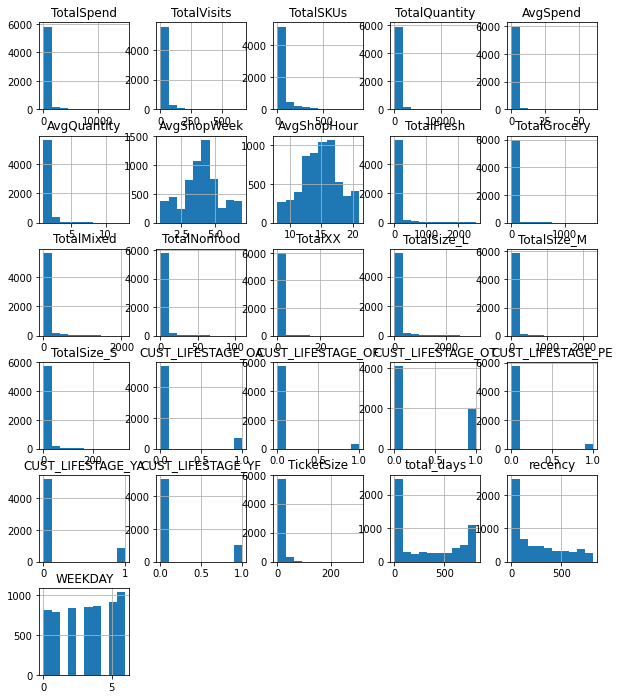

In [ ]:
#plot some of the data
print(len(features), 'features')
df_csv[features].hist(figsize=(10,12))

In [ ]:
df = df_csv[features].copy()
df_std = df.copy()
df_std = preprocessing.scale(df_std)
df_std = pd.DataFrame(df_std)
df_std.columns = features
df_std.head()

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
0,-0.345755,-0.371475,-0.493401,-0.332279,0.246806,-0.703979,2.110372,-0.602223,-0.324584,-0.277456,-0.313207,-0.307941,-0.167585,-0.319762,-0.311120,-0.304597,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.580198,-1.027668,1.228410,0.908684
1,1.012420,3.903694,1.415375,1.220597,-0.243622,-0.163956,0.078494,0.197319,2.112284,1.545436,0.456957,0.706610,-0.167585,-0.036045,4.824496,4.855889,2.759677,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.434857,1.493196,-0.978387,0.908684
2,0.117142,-0.078655,0.674202,0.228576,-0.058202,0.653258,-0.392080,0.179802,-0.156348,0.057788,0.487278,0.199334,-0.167585,0.240835,-0.136159,-0.171136,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,0.789187,0.019843,-0.929886,-1.561666
3,-0.340773,-0.332432,-0.462941,-0.323858,-0.190761,0.138601,-0.508144,-1.097683,-0.329682,-0.235551,-0.313207,0.030243,-0.167585,-0.319762,-0.300828,-0.215623,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.614756,-0.828734,1.968051,0.414614
4,-0.292812,-0.312911,-0.259880,-0.276699,-0.143857,-0.097321,0.015559,0.190514,-0.263407,-0.277456,-0.240436,-0.307941,-0.167585,-0.241142,-0.311120,-0.260110,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.013014,0.865311,-0.925844,1.402754


In [ ]:
df_std.describe()

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
count,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03
mean,-1.159364e-17,-8.716161e-17,-2.821787e-16,-2.925438e-16,-1.147898e-16,-3.205809e-16,-1.749420e-16,1.914134e-16,1.838238e-18,-2.547780e-16,4.392388e-16,-7.324742e-17,3.932328e-16,-3.239849e-16,8.655189e-17,1.489200e-16,2.579175e-16,6.443935e-16,-1.840058e-16,4.433339e-16,8.421315e-17,-1.445838e-16,-2.437031e-17,4.368091e-18,5.427353e-17,-1.167463e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-3.492036e-01,-3.714747e-01,-4.934006e-01,-3.322787e-01,-8.695064e-01,-7.039787e-01,-2.079253e+00,-2.253757e+00,-3.296816e-01,-2.774561e-01,-3.132072e-01,-3.079413e-01,-1.675849e-01,-3.197618e-01,-3.111199e-01,-3.490840e-01,-3.623612e-01,-2.474645e-01,-6.934998e-01,-2.395321e-01,-4.143971e-01,-4.496747e-01,-7.640878e-01,-1.027668e+00,-9.824289e-01,-1.561666e+00
25%,-3.440690e-01,-3.714747e-01,-4.832476e-01,-3.289102e-01,-3.738761e-01,-7.039787e-01,-6.721244e-01,-6.075948e-01,-3.296816e-01,-2.774561e-01,-3.132072e-01,-3.079413e-01,-1.675849e-01,-3.197618e-01,-3.111199e-01,-3.490840e-01,-3.623612e-01,-2.474645e-01,-6.934998e-01,-2.395321e-01,-4.143971e-01,-4.496747e-01,-6.135464e-01,-1.027668e+00,-8.733015e-01,-1.067596e+00
50%,-3.220440e-01,-3.324321e-01,-4.121761e-01,-3.086993e-01,-1.447501e-01,-2.304895e-01,1.555946e-02,5.839137e-02,-3.092894e-01,-2.565033e-01,-3.132072e-01,-3.079413e-01,-1.675849e-01,-3.197618e-01,-2.802445e-01,-2.601101e-01,-3.623612e-01,-2.474645e-01,-6.934998e-01,-2.395321e-01,-4.143971e-01,-4.496747e-01,-3.326778e-01,-2.117284e-01,-4.206252e-01,-7.945617e-02
75%,-1.893442e-01,-1.762615e-01,-6.697194e-02,-1.823808e-01,1.099231e-01,2.802084e-01,6.400584e-01,7.190053e-01,-1.869363e-01,-1.307866e-01,-1.858573e-01,-1.388494e-01,-1.675849e-01,-2.069589e-01,-1.567427e-01,-1.266492e-01,-3.623612e-01,-2.474645e-01,1.441961e+00,-2.395321e-01,-4.143971e-01,-4.496747e-01,2.413434e-01,1.054920e+00,7.231908e-01,9.086837e-01
max,2.093855e+01,1.261020e+01,8.563132e+00,2.940815e+01,2.713019e+01,1.923708e+01,2.110372e+00,2.040233e+00,1.270603e+01,3.175936e+01,1.240966e+01,1.812308e+01,2.609759e+01,1.062896e+01,2.306159e+01,1.442058e+01,2.759677e+00,4.040983e+00,1.441961e+00,4.174806e+00,2.413144e+00,2.223830e+00,2.246508e+01,1.514955e+00,2.323725e+00,1.402754e+00


In [ ]:
exp_clu = setup(data=df_std, normalize=True)

,Description,Value
0,session_id,7487
1,Original Data,"(6100, 26)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 32)"
9,CPU Jobs,-1


In [ ]:
metrics = []
create_model('kmeans')
metric_result = pull()
metric_result['model'] = 'kmeans'
metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1397,1337.6568,1.9152,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
kmeans,0.139700,1337.656800,1.915200,0,0,0


In [ ]:
# Kmeans
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1397,1337.6568,1.9152,0,0,0


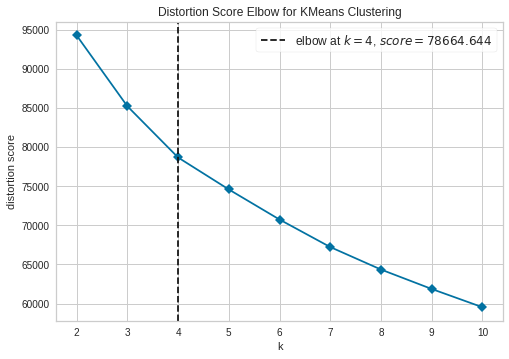

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
kmeans = create_model('kmeans', num_clusters = 4)
plot_model(kmeans)

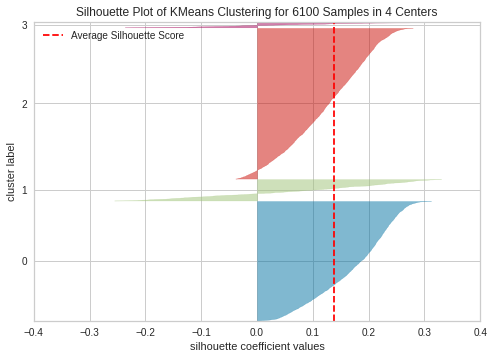

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
df_std['cluster'] = kmeans.fit_predict(df_std)
df_std.head()

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY,cluster
0,-0.345755,-0.371475,-0.493401,-0.332279,0.246806,-0.703979,2.110372,-0.602223,-0.324584,-0.277456,-0.313207,-0.307941,-0.167585,-0.319762,-0.311120,-0.304597,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.580198,-1.027668,1.228410,0.908684,2
1,1.012420,3.903694,1.415375,1.220597,-0.243622,-0.163956,0.078494,0.197319,2.112284,1.545436,0.456957,0.706610,-0.167585,-0.036045,4.824496,4.855889,2.759677,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.434857,1.493196,-0.978387,0.908684,1
2,0.117142,-0.078655,0.674202,0.228576,-0.058202,0.653258,-0.392080,0.179802,-0.156348,0.057788,0.487278,0.199334,-0.167585,0.240835,-0.136159,-0.171136,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,0.789187,0.019843,-0.929886,-1.561666,0
3,-0.340773,-0.332432,-0.462941,-0.323858,-0.190761,0.138601,-0.508144,-1.097683,-0.329682,-0.235551,-0.313207,0.030243,-0.167585,-0.319762,-0.300828,-0.215623,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.614756,-0.828734,1.968051,0.414614,2
4,-0.292812,-0.312911,-0.259880,-0.276699,-0.143857,-0.097321,0.015559,0.190514,-0.263407,-0.277456,-0.240436,-0.307941,-0.167585,-0.241142,-0.311120,-0.260110,-0.362361,-0.247465,-0.6935,-0.239532,-0.414397,-0.449675,-0.013014,0.865311,-0.925844,1.402754,0


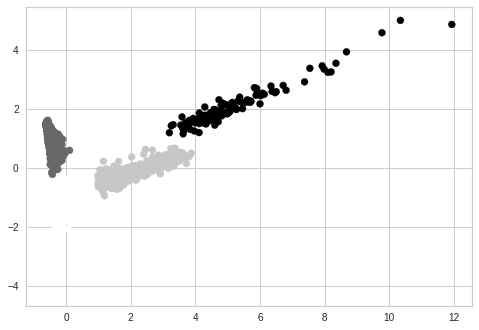

In [ ]:
# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(df)
df_std['x'] = pca.fit_transform(df_std)[:, 0]
df_std['y'] = pca.fit_transform(df_std)[:, 1]
plt.scatter(df_std['x'], df_std['y'], c=df_std['cluster'])
plt.show()

In [ ]:
df['cluster'] = df_std['cluster']
print(df.shape)
df.head()
# df.groupby('cluster').mean()

(6100, 27)


,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY,cluster
0,2.44,1,1,1,2.440000,1.000000,7.000000,13.000000,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,2.440000,1,547,5,2
1,959.33,220,189,923,1.372432,1.320458,4.090129,15.420601,479.0,87.0,127.0,6,0,83.0,499.0,117.0,1,0,0,0,0,0,4.360591,812,1,5,1
2,328.57,16,116,334,1.776054,1.805405,3.416216,15.367568,34.0,16.0,132.0,3,0,164.0,17.0,4.0,0,0,0,0,0,0,20.535625,338,13,0,0
3,5.95,3,4,6,1.487500,1.500000,3.250000,11.500000,0.0,2.0,0.0,2,0,0.0,1.0,3.0,0,0,0,0,0,0,1.983333,65,730,4,2
4,39.74,4,24,34,1.589600,1.360000,4.000000,15.400000,13.0,0.0,12.0,0,0,23.0,0.0,2.0,0,0,0,0,0,0,9.935000,610,14,6,0


In [ ]:
df["cluster"].value_counts()

2    3069
0    2482
1     439
3     110
Name: cluster, dtype: int64

In [ ]:
orange = sns.light_palette('orange', as_cmap = True)
df.groupby('cluster').mean().reset_index().style.background_gradient(cmap = orange)

In [ ]:
summary = df.groupby('cluster').describe()
print(summary.shape)
orange = sns.light_palette('orange', as_cmap = True)
summary.style.background_gradient(cmap = orange)

In [ ]:
orange = sns.light_palette('orange', as_cmap = True)
df.groupby('cluster').mean().reset_index().style.background_gradient(cmap = orange)

,cluster,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
0,0,152.444694,14.621273,45.310234,116.937953,2.086321,1.470554,3.976168,14.880105,37.012893,9.571716,30.446817,1.620467,0.197019,50.431910,21.620064,6.796938,0.125302,0.056809,0.318695,0.055197,0.150282,0.162369,11.832483,581.407333,61.485496,3.092264
1,1,1537.126674,110.132118,273.113895,1233.560364,1.853367,1.480282,4.004365,14.846827,424.927107,70.596811,325.785877,8.671982,1.193622,633.870159,159.592255,37.712984,0.159453,0.054670,0.252847,0.104784,0.104784,0.211845,16.647608,776.881549,7.849658,3.651481
2,2,13.479488,1.723688,6.810688,10.577387,1.763935,1.361491,3.975042,14.784041,3.349299,1.086347,2.773542,0.216357,0.024112,4.384490,2.009449,1.055718,0.100033,0.057022,0.345064,0.045943,0.151189,0.165852,7.620481,48.786901,432.193223,3.105898
3,3,3693.625455,293.181818,447.981818,3139.190909,1.830723,1.546469,3.980976,14.538608,961.709091,206.300000,799.554545,23.781818,3.563636,1397.518182,495.572727,101.818182,0.181818,0.109091,0.181818,0.063636,0.100000,0.190909,14.443565,809.345455,2.481818,4.281818


In [ ]:
summary.to_csv("summary.csv", index= False)

# **Interpret results and plan for actions**

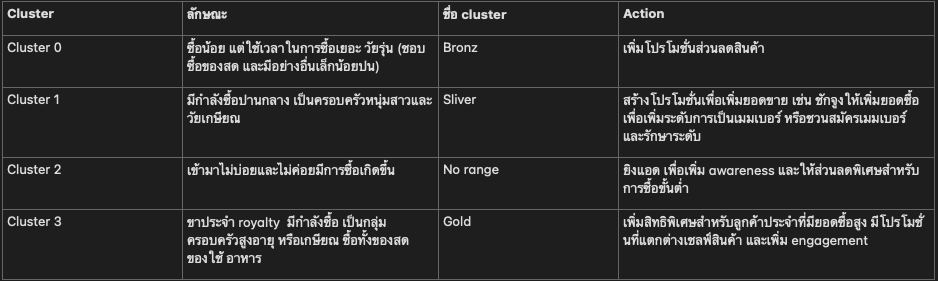